In [1]:
import os
import sys
sys.path.append('..')
import torch

import pretorched.visualizers as vutils
from pretorched.models import utils as mutils
import core
from data import VideoFolder

%load_ext autoreload
%autoreload 2

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [3]:
data_root = os.environ.get('DATA_ROOT', '')
part_dir = os.path.join(data_root, 'DeepfakeDetection', 'facenet_videos', 'dfdc_train_part_0')
videos = os.listdir(part_dir)

In [4]:
datadir = os.path.join(part_dir, videos[1])
dataset = VideoFolder(datadir, step=12)
print(dataset)

Dataset VideoFolder
  Root dir: /data/datasets/DeepfakeDetection/facenet_videos/dfdc_train_part_0/bqefygjsnx.mp4
  Number of datapoints: 2
  Transforms (if any): VideoToTensor(rescale=False, ordering='CTHW')



In [5]:
model = core.get_model('CaricatureModel')
# print(model)

# fake_ckpt_file = 'weights/resnet18_all_seg_count-16_init-imagenet-ortho_optim-Ranger_lr-0.001_sched-CosineAnnealingLR_bs-33_best.pth.tar'
fake_ckpt_file = 'weights/d'
mag_ckpt_file = 'models/deep_motion_mag/ckpt/ckpt_e11.pth.tar'
fake_ckpt = torch.load(fake_ckpt_file, map_location='cpu')
mag_ckpt = torch.load(mag_ckpt_file, map_location='cpu')

model.fake_model.load_state_dict(mutils.remove_prefix(fake_ckpt['state_dict']))
model.mag_model.load_state_dict(mutils.remove_prefix(mag_ckpt['state_dict']))
model = model.to(device)

In [6]:
name, frames, target = dataset[0]
frames = frames.unsqueeze(0)

In [7]:
print(frames.shape)
frames = frames.to(device)
out, attn_maps = model(frames)
out = out.detach()
attn_maps = attn_maps.detach()

torch.Size([1, 3, 25, 360, 360])
one_hot: torch.Size([25, 2])
self.preds: torch.Size([25, 2])
fmaps torch.Size([25, 512, 12, 12])
fmaps[0] torch.Size([512, 12, 12])
weights torch.Size([25, 512, 1, 1])
o torch.Size([25, 12, 12])


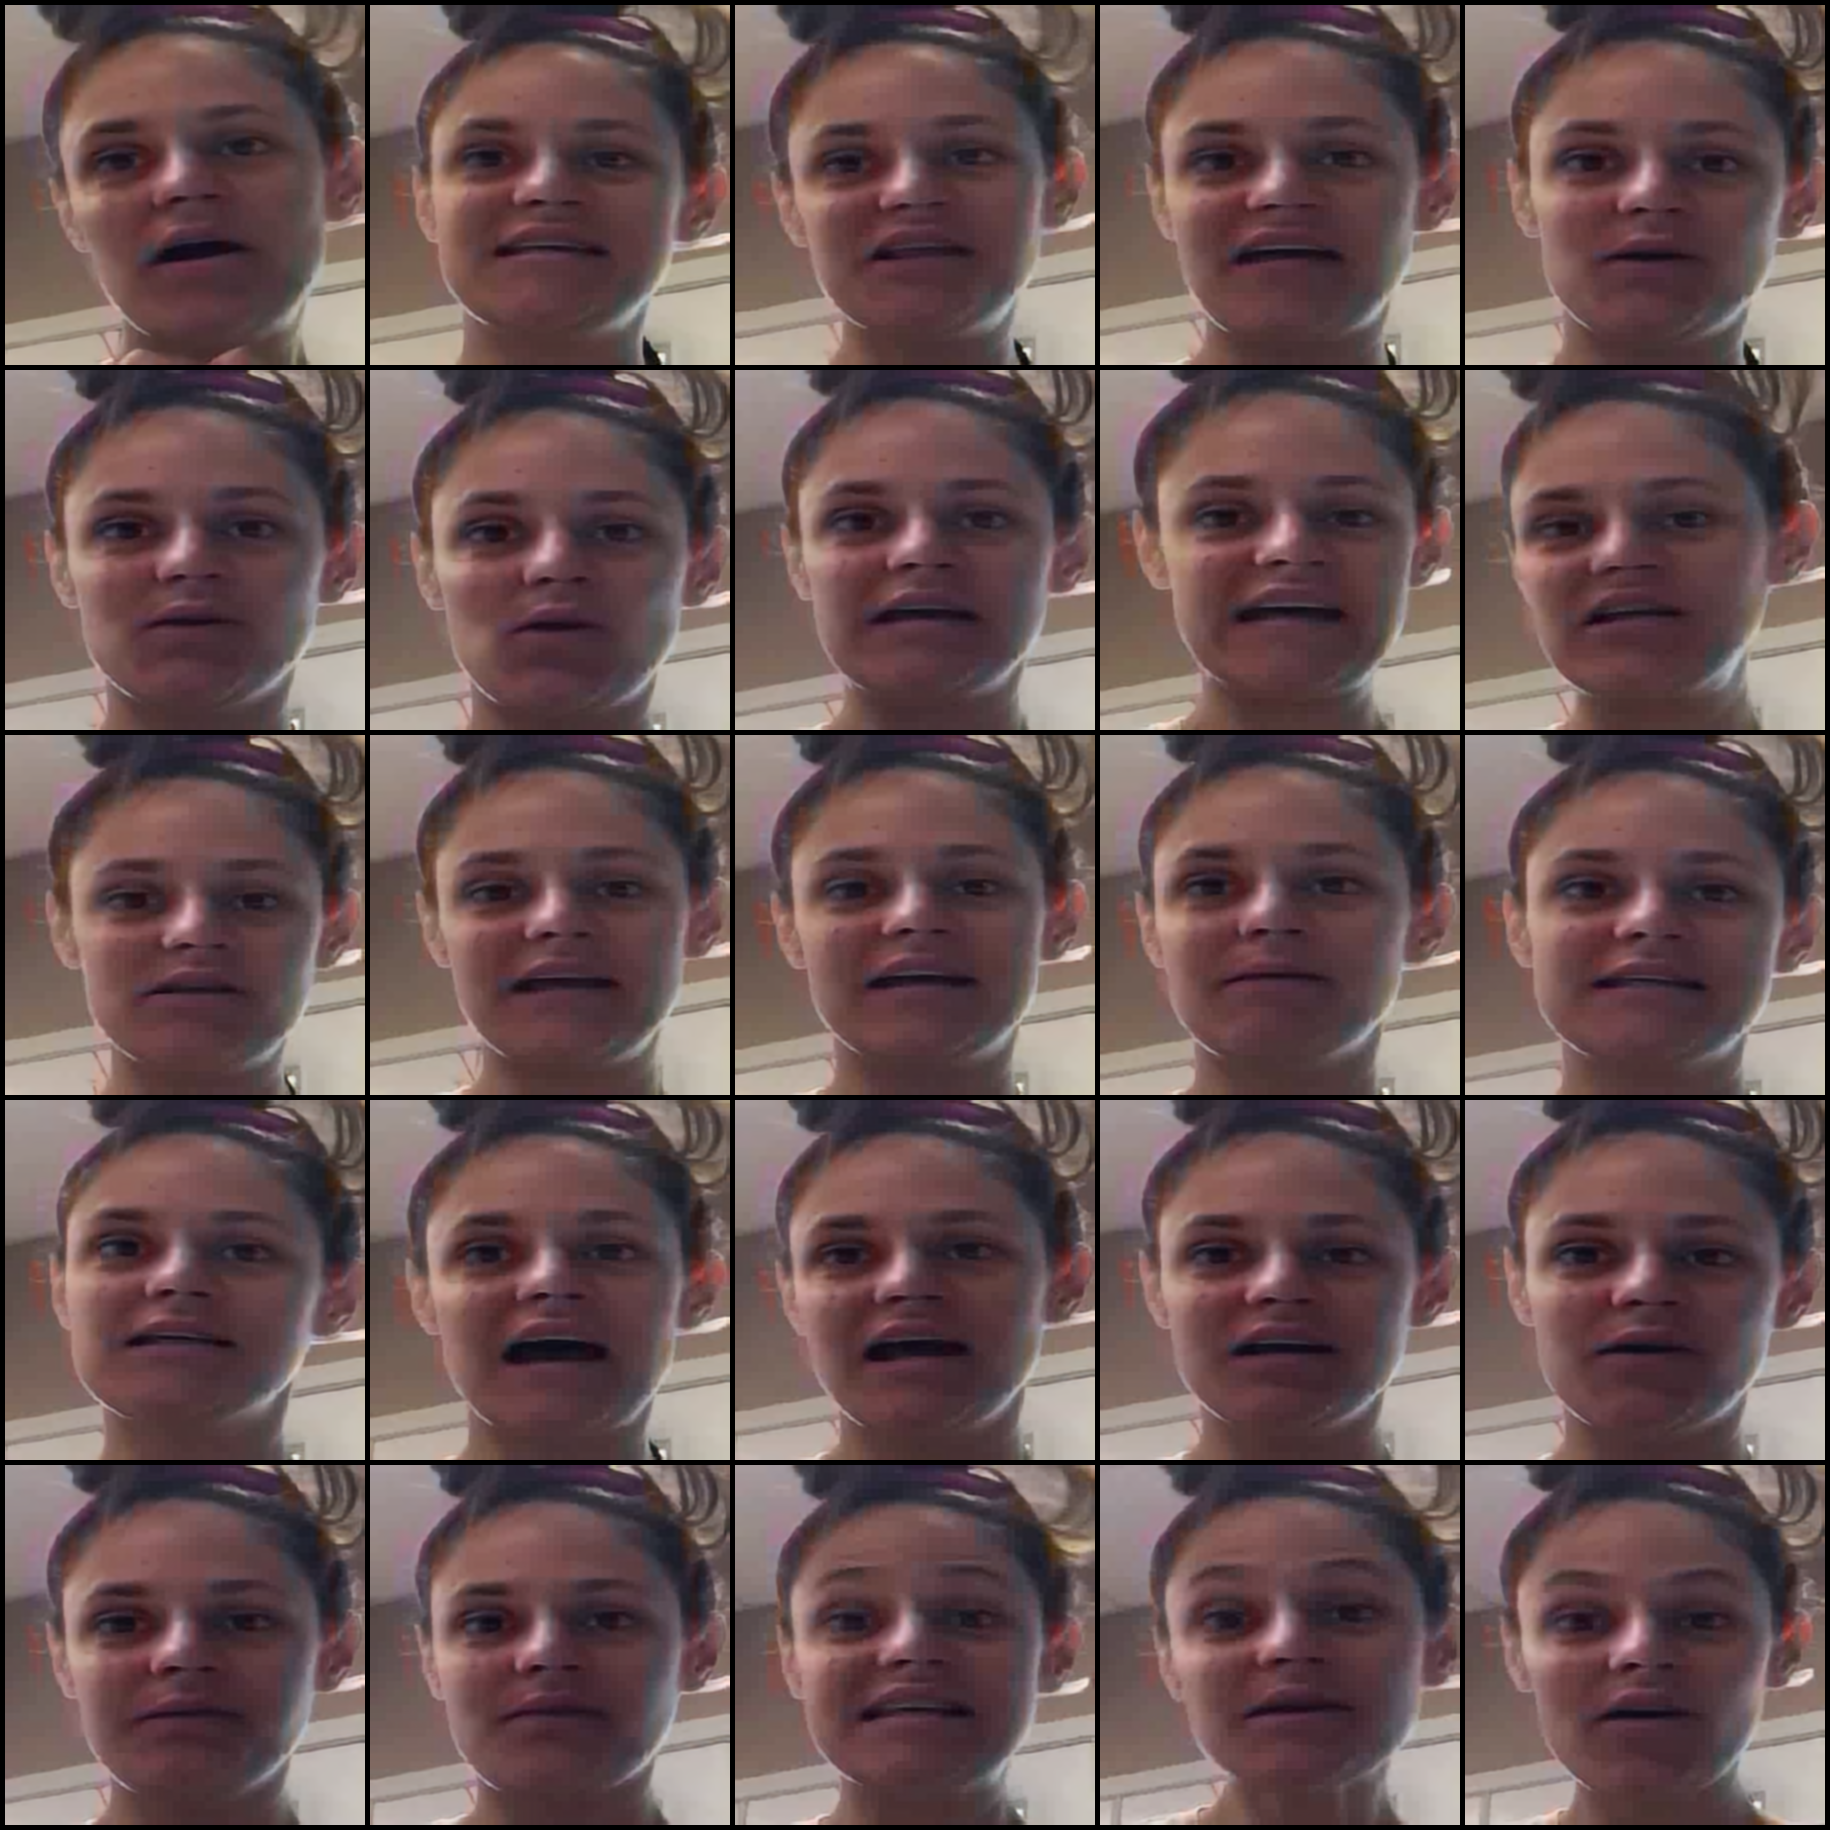

In [8]:
vutils.visualize_samples(out.squeeze(0).transpose(0, 1), nrow=5)